# ST433 Summer Project
35757

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gmean

rng = np.random.default_rng(6)

## Solution 1

### Part 1
Given the cumulative dsitribution function (cdf) 
\begin{equation*}
  F(x) =
    \begin{cases}
      0 & if\quad x<1\\
      x-\frac{3}{4} & if\quad 1\leq x<\frac{3}{2}\\
      1 & if\quad x\geq\frac{3}{2},
    \end{cases}       
\end{equation*}

its generalized inverse $F^{-1}$ is defined by 

\begin{align*}
	F^{-1}(u) = \text{inf} \{x \in \mathbb{R}| F(x)\geq u\} \quad \text{for} \quad u \in (0,1).
\end{align*}

It has $F(F^{-1}(u)) \geq u$, the equal sign holds for strictly increasing continous function. When there are jumps ot flat curve in the culmulative distribution function, the inequality holds.

In this question, $F(x)$ has jump points when $x=1$ and $x=\frac{3}{2}$.Therefore, the generalised inverse of F is given by:

\begin{equation}
  F^{-1}(u) =
    \begin{cases}
      1 & if\quad 0<u<\frac{1}{4}\\
      u+\frac{3}{4} & if\quad \frac{1}{4}\leq u<\frac{3}{4}\\
      \frac{3}{2} & if\quad \frac{3}{4}\leq u <1.
    \end{cases}       
\end{equation}

If $U \sim \mathcal{U}(0,1)$, then the random variable $F^{-1}(u)$ has cumulative distribution function $F$. Therefore, to sample from $F$, we can first generate ramdom number $u \sim \mathcal{U}(0,1)$, and then calculate $F^{-1}(u)$.


### Part 2

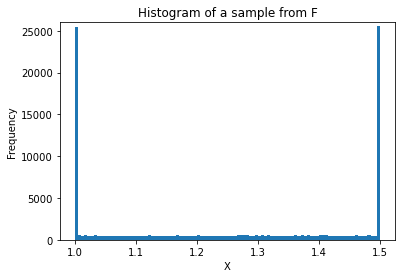

In [2]:
sample_size = 100000
u = rng.random(size=sample_size)

x = np.zeros(sample_size)
for i in range(sample_size):  
    if u[i] >= 0.75:
        x[i] = 1.5
    elif u[i]<=0.25:
        x[i] = 1
    elif u[i]>0.25 and u[i] < 0.75:
        x[i]=u[i]+0.75

fig,ax = plt.subplots(1,1)
ax.hist(x, bins=100)
ax.set_title("Histogram of a sample from F")
ax.set_xlabel("X")
ax.set_ylabel("Frequency")
ax.set_ylim((0, 26000))
plt.show()

### Part 3
The method of antithetic variates attempts to exploit negative correlation between random variables to reduce the variance. For $U \sim \mathcal{U}(0,1)$, the antithetic variates $Y$ should be calculated with $1-U \sim \mathcal{U}(0,1)$. $F^{-1}(U)$ and $F^{-1}(1 − U)$ both have cdf $F$ and are antithetic since $F^{-1}$ is monotone.

Let $Y = F^{-1}(1 - u)$
\begin{equation}
  F^{-1}(1-u) =
    \begin{cases}
      \frac{3}{2} & \text{if}\quad 0<u<\frac{1}{4}\\
      \frac{7}{4}-u & \text{if}\quad \frac{1}{4}\leq u<\frac{3}{4}\\
      1 & \text{if}\quad \frac{3}{4}\leq u <1
    \end{cases}       
\end{equation}

In [3]:
y = np.zeros(sample_size)
for i in range(sample_size):  
    if u[i] >= 0.75:
        y[i] = 1
    elif u[i]<=0.25:
        y[i] = 1.5
    elif u[i]>0.25 and u[i] < 0.75:
        y[i]=1.75-u[i]
        

In [4]:
covariance = np.cov(x, y, ddof=1)[0, 1]
print('The covariance is: ', covariance)

The covariance is:  -0.041665072011290744


Therefore, the covariance is less than 0, the antithetic pair $(X, Y)$, i.e. $(U, 1-U)$, which is sampled from $U \sim \mathcal{U}(0,1)$ and $1-U \sim \mathcal{U}(0,1)$, can reduce the variance.

## Solution 2

### Part 1
#### (a)
The probability distribution of $(\hat{X}_1,...,\hat{X}_{10})^\top$ is $\mathcal{N}_{10}(0, \Sigma)$, where $\Sigma$ is 
\begin{pmatrix}
h & 0 & 0 & \dots & 0  \\
0 & 2h & 0 & \dots & 0\\
0 & 0 & 3h & \dots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0 & 0 & 0 & \dots & 10h\\
\end{pmatrix}

Because $\hat X_i = \sqrt{ih}Z_i$ for all $i \in \{1, ..., 10\}$ and $Z = (Z_1, ..., Z_{10})^\top \sim \mathcal{N}_{10}(0, I_{10})$, $Z_i$ are i.i.d standard normal random variable, and $X_i$ are also i.i.d random variable with 

\begin{align*}
   cov(\hat X_i, \hat X_j) & = 0 \quad \text{for} \quad i \neq j\\
   var(\hat X_i) & = ih
\end{align*}

Therefore, the covariance matrix $\Sigma$ is given by:

\begin{pmatrix}
h & 0 & 0 & \dots & 0  \\
0 & 2h & 0 & \dots & 0\\
0 & 0 & 3h & \dots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0 & 0 & 0 & \dots & 10h\\
\end{pmatrix}

#### (b)
It is not an exact scheme because the joint distribution of the simulated values $(\hat{X}_1,...,\hat{X}_{10})^\top$ above does not coincide with the distribution of the corresponding Brownian motion $(W_t)$ at $t_1, ..., t_n$ given by $(\hat{W}_1,...,\hat{W}_{10})^\top$.

For $ i = 0, ..., 9 $, we define 
\begin{align*}
   \hat W_{t_{i+1}} = \hat W_{t_i} + \sqrt{h} Z_{i+1},
\end{align*}

where $Z_1, ..., Z_{10}$ are i.i.d standard normally distributed random variables and $\hat W_0 = 0$ 


The covariance of Brownian motion is 

\begin{align*}
   cov(\hat W_s, \hat W_t) = min(s,t)h ,
\end{align*}

and the convariance matrix $\Sigma^\prime$ is given by

\begin{pmatrix}
h & h & h & \dots & h  \\
h & 2h & 2h & \dots & 2h\\
h & 2h & 3h & \dots & 3h\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
h & 2h & 3h & \dots & 10h\\
\end{pmatrix}

Therefore, the joint probability distribution of Brownian motion $(\hat{W}_1,...,\hat{W}_{10})^\top$ is $\mathcal{N}_{10}(0, \Sigma^\prime)$, and  $\Sigma \neq \Sigma^\prime$, it is not an exact scheme.

### Part 2

The stochastic process is 

\begin{align*}
	dX_t = cX_t dW_t,
\end{align*}

where $c$ is a constant and not equal to 0.



The first order Euler scheme is given by $\hat X_0 = X_0$ and for $j = 0, 1, 2, ...$

\begin{align*}
	\hat X_{(j+1)h} = \hat X_{jh} + \mu (\hat X_{jh}) h + \sigma (\hat X_{jh}) \sqrt{h}Z_{j+1}, 
\end{align*}

The Milstein scheme is given by $\hat X_0 = X_0$ and for j = 0, 1, 2, ...

\begin{align*}
	\hat X_{(j+1)h} = \hat X_{jh} + \mu (\hat X_{jh}) h + \sigma (\hat X_{jh}) \sqrt{h}Z_{j+1} + \frac{1}{2} \sigma (\hat X_{jh})\sigma^\prime (\hat X_{jh}) h (Z^2_{j+1}-1), 
\end{align*}

The second order Euler scheme is given by $\hat X_0 = X_0$ and for j = 0, 1, 2, ...

\begin{align*}
	\hat X_{(j+1)h} = & \hat X_{jh} + \mu (\hat X_{jh}) h + \sigma (\hat X_{jh}) \bar W_{j} + \frac{1}{2} \sigma (\hat X_{jh})\sigma^\prime (\hat X_{jh}) (\bar W^2_{j}-h )\\
    &+ \left(\frac{1}{2}\sigma^2(\hat X_{jh})\mu^{\prime\prime}(\hat X_{jh}) + \mu(\hat X_{jh})\mu^\prime(\hat X_{jh})\right)\frac{h^2}{2}+\sigma(\hat X_{jh})\mu^\prime(\hat X_{jh})\bar J_j \\
    &+ \left(\frac{1}{2}\sigma^2(\hat X_{jh})\sigma^{\prime\prime}(\hat X_{jh}) + \mu(\hat X_{jh})\sigma^\prime(\hat X_{jh})\right)(h\bar W_j - \bar J_j), 
\end{align*}

To satisfy the condition that the first order Euler scheme and the Milstein scheme do not coincide, the last term in Milstein scheme should not equal to 0, namely:

\begin{align*}
    \frac{1}{2} \sigma (\hat X_{jh})\sigma^\prime (\hat X_{jh}) h (Z^2_{j+1}-1) \neq 0, 
\end{align*}

To satisfy the condition that the second order Euler scheme coincides with the Milstein scheme, the last several terms in second order Euler scheme should be 0, namely:

\begin{align*}
	 \left(\frac{1}{2}\sigma^2(\hat X_{jh})\mu^{\prime\prime}(\hat X_{jh}) + \mu(\hat X_{jh})\mu^\prime(\hat X_{jh})\right)\frac{h^2}{2}+\sigma(\hat X_{jh})\mu^\prime(\hat X_{jh})\bar J_j + \left(\frac{1}{2}\sigma^2(\hat X_{jh})\sigma^{\prime\prime}(\hat X_{jh}) + \mu(\hat X_{jh})\sigma^\prime(\hat X_{jh})\right)(h\bar W_j - \bar J_j) = 0, 
\end{align*}

When $\mu (X_{jh}) = 0$ and $\sigma (X_{jh}) = cX_{jh}$ the equal sign holds, where c is constant and not equal to 0.

Therefore, the stochastic process 

\begin{align*}
	dX_t = cX_t dW_t,
\end{align*}

where c is a constant and not equal to 0, satisfies the two conditions.

## Solution 3

### Part1.
This Asian put option has payoff
\begin{align*}
	H = (K - \frac{1}{m}\sum_{j=1}^{m} S_{t_j})^+, 
\end{align*}
where $0 = t_0 < t_1 < \ldots < t_m=T$ is a fixed set of dates, $T$ is the maturity of the option, $K$ is the strike price.

We consider the Black-Scholes model with time-$t$ stock price  
\begin{align*}
	S_t = S_0 \exp \left( (r - \frac{\sigma^2}{2}) t + \sigma W_t \right)
\end{align*}
and riskless asset with time-$t$ price $B_t = e^{rt}$. 
The time-0 price of the Asian option is given by (expectation is taken under the risk-neutral probability measure)
\begin{align*}   
	I=\mathbb{E}[e^{-rT}(K - \frac{1}{m}\sum_{j=1}^{m} S_{t_j})^+].  
\end{align*}
We can compute the price of this option using a Monte Carlo estimator
\begin{align*}
	\hat{I}_{MC} = \frac{1}{n} \sum_{i=1}^n Y_i, 
\end{align*}
where $Y_i$ are i.i.d. with the same distribution as the random variable $$Y=e^{-rT}(K - \frac{1}{m}\sum_{j=1}^{m} S_{t_j})^+,$$ 
(As usual $r \geq 0$ is the interest rate, $\sigma>0$ the volatility and $(W_t)$ is a Brownian motion under the risk-neutral probability measure.)

which in the combined version is that
\begin{align*}
	\hat{I}_{MC} = \frac{1}{n} \sum_{i=1}^n [e^{-r T} (K - \frac{1}{m} \sum_{j=1}^m S_{i,t_j} )],
\end{align*}


In [5]:
def asianput_mc(rng, s0, K, T, mu, sigma, no_of_paths, no_of_steps, epsilon):
    h = T / no_of_steps
    norm_matrix = rng.standard_normal(size=(no_of_paths, no_of_steps))
    rv = np.cumsum(norm_matrix, axis=1)
    timepoints = np.arange(1, no_of_steps+1) * h
    tmp1 = (mu - 0.5 * sigma ** 2) * timepoints
    tmp2 = np.sqrt(h) * sigma * rv
    paths = s0 * np.exp(np.tile(tmp1,  reps=(no_of_paths,1)) + tmp2)
    paths = np.insert(paths, 0, s0 ,axis=1)
    
    avg_price = np.mean(paths[:,1:],axis=1)
    payoff = np.maximum(K - avg_price, 0)
    discounted_payoffs = np.exp(- mu * T)*payoff
    
    price = np.mean(discounted_payoffs)
    standarddev_mcest = np.std(discounted_payoffs, ddof=1) / np.sqrt(no_of_paths)
    aepsilon = norm.ppf(1.0 - epsilon * 0.5)
    ci_left = price - aepsilon * standarddev_mcest
    ci_right = price + aepsilon * standarddev_mcest
    return price, standarddev_mcest, ci_left, ci_right

In [6]:
result = asianput_mc(rng, 100, 100, 1, 0.01, 0.3, 100000, 100, 0.01)
print("MC price of Asian put option: ", round(result[0], 6), ", stdev of MC est: ", 
      round(result[1], 6))
print("The corresponding CI is: (", round(result[2], 6), ", " ,  round(result[3], 6), ").")

MC price of Asian put option:  6.644019 , stdev of MC est:  0.027858
The corresponding CI is: ( 6.572261 ,  6.715777 ).


### Part 2
The control variate is  suitable


In [7]:
def asianput_cv(rng, s0, K, T, mu, sigma, no_of_paths, no_of_steps):
    h = T / no_of_steps
    norm_matrix = rng.standard_normal(size=(no_of_paths, no_of_steps))
    rv = np.cumsum(norm_matrix, axis=1)
    timepoints = np.arange(1, no_of_steps+1) * h
    tmp1 = (mu - 0.5 * sigma ** 2) * timepoints
    tmp2 = np.sqrt(h) * sigma * rv
    paths = s0 * np.exp(np.tile(tmp1,  reps=(no_of_paths,1)) + tmp2)
    paths = np.insert(paths, 0, s0 ,axis=1)
    
    avg_price = np.mean(paths[:,1:],axis=1)
    geom_price = gmean(paths[:,1:],axis=1)
    
    payoff_mc = np.maximum(K - avg_price, 0)
    payoff_cv = np.maximum(K - geom_price, 0)
    
    discpay_mc = np.exp(- mu * T)*payoff_mc
    discpay_cv = np.exp(- mu * T)*payoff_cv
    
    tmpcov = np.cov(discpay_cv, discpay_mc, ddof=1)[0, 1]
    tmpvarx = np.var(discpay_cv, ddof=1)
    tmpvary = np.var(discpay_mc, ddof=1)
    rhosquared = (tmpcov ** 2) / (tmpvarx * tmpvary)
    return rhosquared
    

In [8]:
rho_sqd = asianput_cv(rng, s0=100, K=100, T=1, mu=0.01, sigma=0.3, no_of_paths=10000, no_of_steps=100)
rho_sqd

0.998555615483777

### Part 3


I prefer second method.The second method reduces the variance significantly by 99%, which is almost an degenerated distribution can provide us a numerical result much closer to the analytical result. 
However, we need to balance the computational burden with the variance reduction. Because this specific control variate is also path dependent, it requires more time to get the results. 

## Solution 4

### Part 1
Taking $u(t) = 3e^t - 5t +5$ into the ODE and initial condition, we can find that the equal sign holds,

\begin{align*}
	u^\prime(t) & = 3e^t - 5 = u(t) + 5t -10\\
   u(0) & = 8
\end{align*}

Therefore, $u(t) = 3e^t - 5t +5$ is a solution for the ODE with the given initial condition.

### Part 2
First we approximate the dirivative using forward scheme

\begin{align*}
   u^\prime (t) = \frac{u(t+\Delta t)-u(t)}{\Delta t} + O(\Delta t).
\end{align*}

Ignore the error term and simplify the notation, we obtain the equation

\begin{align*}
   u^\prime (t) = \frac{u_{t+1}-u_{t}}{\Delta t} = u_t + 5t - 10 .
\end{align*}

This is equivalent to

\begin{align*}
   u^\prime (t) = \frac{u_{t+1}-u_{t}}{\Delta t} = u_t + 5t - 10 .
\end{align*}

This expression can be rewritten as
\begin{align*}
   u_{t+1} = (1 + \Delta t)u_t + 5t\Delta t - 10\Delta t .
\end{align*}

In [9]:
def fwd_fds (n,which): 
    #the argument 'which' means which point in the grid I want to calculate
    deltat = 2/n
    all = [8]
    for l in range(1,which+1):
        value = (1 + deltat)*all[l-1]+ 5*(l-1)*deltat*deltat -10*deltat
        all.append(value)
    return value, all

### Part 3

In [10]:
t = np.linspace(0,2,200)
u_analytical = 3*np.exp(t)-5*t+5
u_fwd_fds = fwd_fds(200,200)[1]

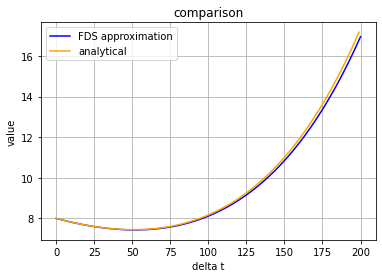

In [11]:
plt.figure()
plt.plot(u_fwd_fds, label='FDS approximation',color='blue')
plt.plot(u_analytical, label='analytical',color='orange')

plt.legend()
plt.xlabel('delta t')
plt.ylabel('value')
plt.title('comparison')
plt.grid(True)

From the picture we can see that two line almost coincide. Particularly, the two lines coincide perfectly at the beginning, which means the approximation result is very accurate with the analytical result. With the increasing of the steps, however, the difference become larger, which means the difference between approximation result and the true analytical result is larger, the approximation result is less accurate in the later half of the process.

Therefore, we can find that if we use finite difference scheme to approximate the solution of PDE or ODE, the result is much more accurate at the beginning. With the increment of the steps, the approximation error accumulates, which results in larger error in the later half of the process. 

We should pay attention to the error and minimize it by extending the length approximation window or inceasing the steps in the window, which will be discussed next.



### Part 4
Becasue $\frac{1.77}{2}=\frac{177}{200}$, and the only common factor of 177 and 200 is 1, to make sure that 1.77 is on the exact grid point, n should be multiples of 200, ie: 200, 400, 600, ... . First, we calculate the true value of $u(1.77)$.

In [12]:
true_u = 3*np.exp(1.77)-5*1.77+5
print('The analytical value of u(1.77) is :',true_u)

The analytical value of u(1.77) is : 13.762560084147806


Then we guess that the larger the n is, the smaller the difference between $u(1.77)$ and $\hat u(1.77)$ should be. To verify the guess, we plot the difference with n.

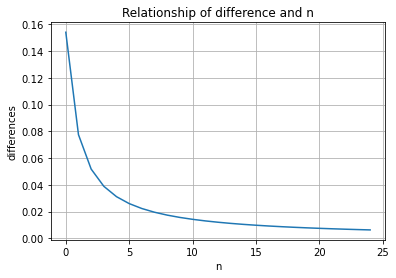

In [13]:
t = np.linspace(200, 5000, 25)
diffs = np.zeros(25)
for i in range(25):
    which = int(t[i]*1.77/2)
    u_hat = fwd_fds(t[i],which)[0]
    diffs[i] = abs(u_hat - true_u)
    
plt.figure()
plt.plot(diffs)
plt.xlabel('n')
plt.ylabel('differences')
plt.title('Relationship of difference and n')
plt.grid(True)

The picture verifies our guess. Therefore, we use while loop in python to find the smallest n that makes $\lvert u(1.77) − \hat u(1.77)\rvert ≤ 0.001$

In [14]:
true_u = 3*np.exp(1.77)-5*1.77+5
n=200
which = int(n*1.77/2)
u_hat = fwd_fds(n,which)[0]
diff = abs(u_hat - true_u)
while diff > 0.001:
    n += 200
    which = int(n*1.77/2)
    u_hat = fwd_fds(n,which)[0]
    diff = abs(u_hat - true_u)
print('The smallest n is: ', n)
print('The difference is: ',diff)

The smallest n is:  31200
The difference is:  0.0009991030334006723


Therefore, for any $n \geq 31200$, $|u(1.77) − \hat u_n(1.77)| \leq 0.001$.